Explore data through different visualizations and create new features for future model

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from datetime import date
import calendar

In [48]:
#import cleaned dataframe and reset index properly to datetime 
df = pd.read_csv('ozone_combined_cleaned.csv')
df.rename(columns = {"Unnamed: 0": "Date"}, inplace = True) 
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)

#decided wind direction was not important for now with this model of one city
df = df.drop(['Wind Dir'], axis = 1)
df.head(3)

,Temp,Ozone,Pressure,Humidity,Wind Speed
Date,,,,,
2016-01-01 00:00:00,46.6,0.004,1007.0,35.0,NaN
2016-01-01 01:00:00,45.7,0.003,1007.0,36.0,NaN
2016-01-01 02:00:00,45.4,0.003,1007.0,33.0,NaN


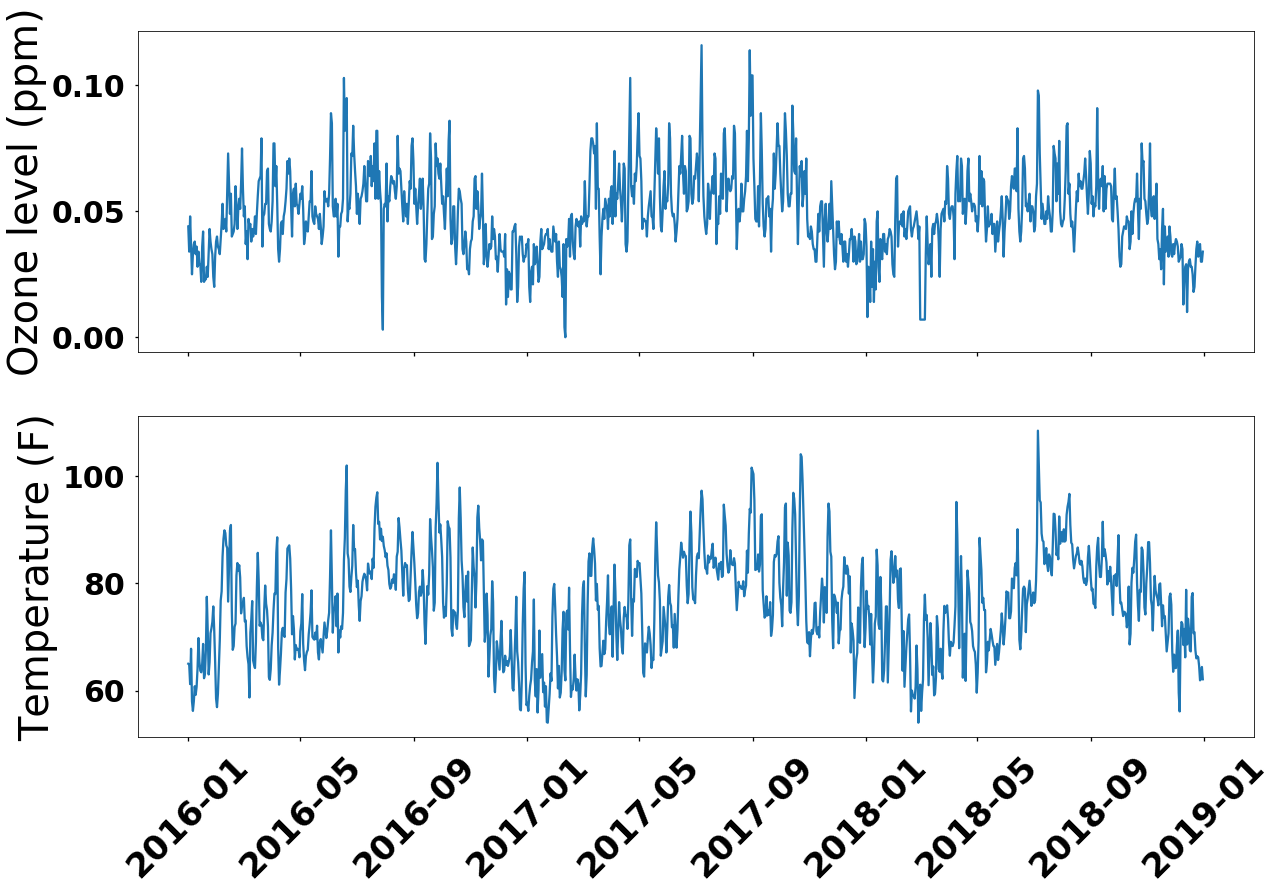

In [93]:
#resample for daily maxiumum value and then graph
#do it in two segments to fit it in ppt slides nicely

day_max = df.resample('D').max()
fig, ax = plt.subplots(2,1, figsize=(20, 13), sharex = True)
ax[0].plot(day_max.index, day_max['Ozone'])
ax[1].plot(day_max.index, day_max['Temp'])
#ax[2].plot(day_max.index, day_max['Pressure'])
# ax.set(title = 'Daily maximum levels', xlabel = 'Date')
ax[0].set(ylabel = 'Ozone level (ppm)')
ax[1].set(ylabel = 'Temperature (F)')
#ax[2].set(ylabel = 'Max pressure (mbars)')
ax[0].yaxis.label.set_size(40)
ax[1].yaxis.label.set_size(40)
plt.xticks(fontsize=34, rotation=45)
plt.show
plt.savefig('year_line_plots1.png', bbox_inches = "tight")

<function matplotlib.pyplot.show(*args, **kw)>

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


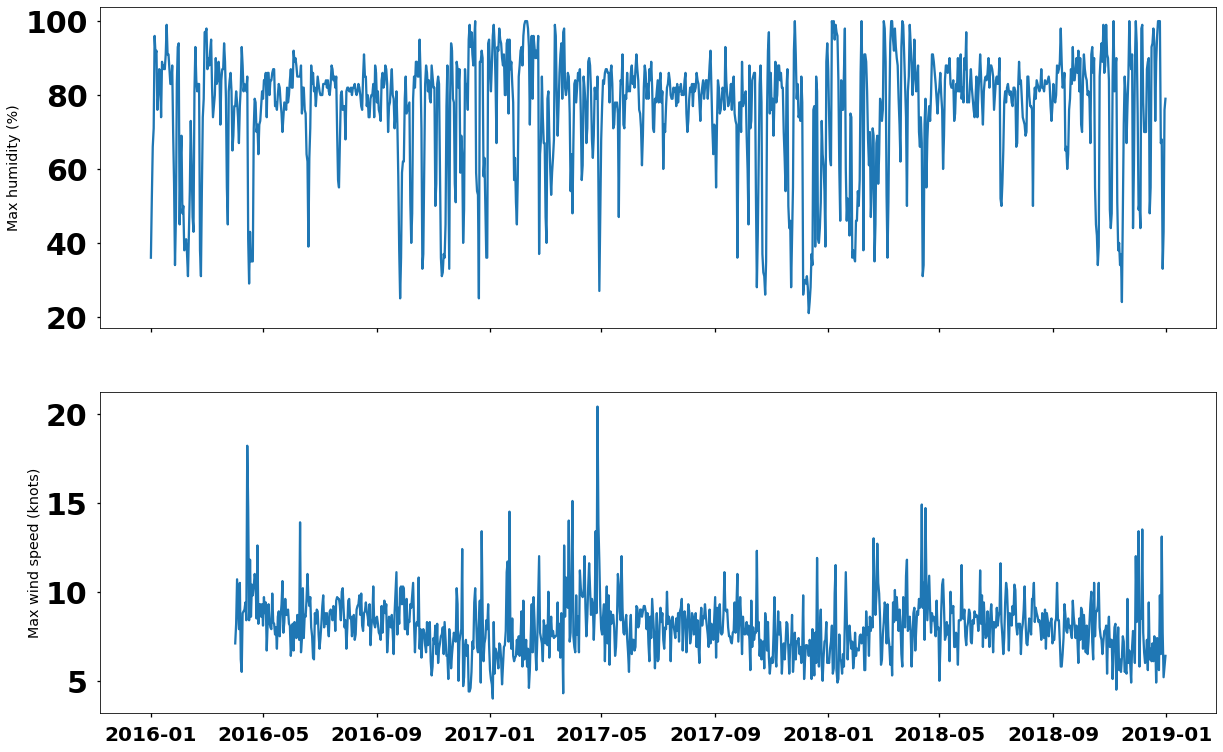

In [70]:
plt.style.use('seaborn-talk')
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=30) 
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(2,1, figsize=(20, 13), sharex = True)
ax[0].plot(day_max.index, day_max['Humidity'])
ax[1].plot(day_max.index, day_max['Wind Speed'])
#ax.set(title = 'Daily maximum levels', xlabel = 'Date')
ax[0].set(ylabel = 'Max humidity (%)')
ax[1].set(ylabel = 'Max wind speed (knots)')
plt.show
#plt.savefig('year_line_plots2.png')

<function matplotlib.pyplot.show(*args, **kw)>

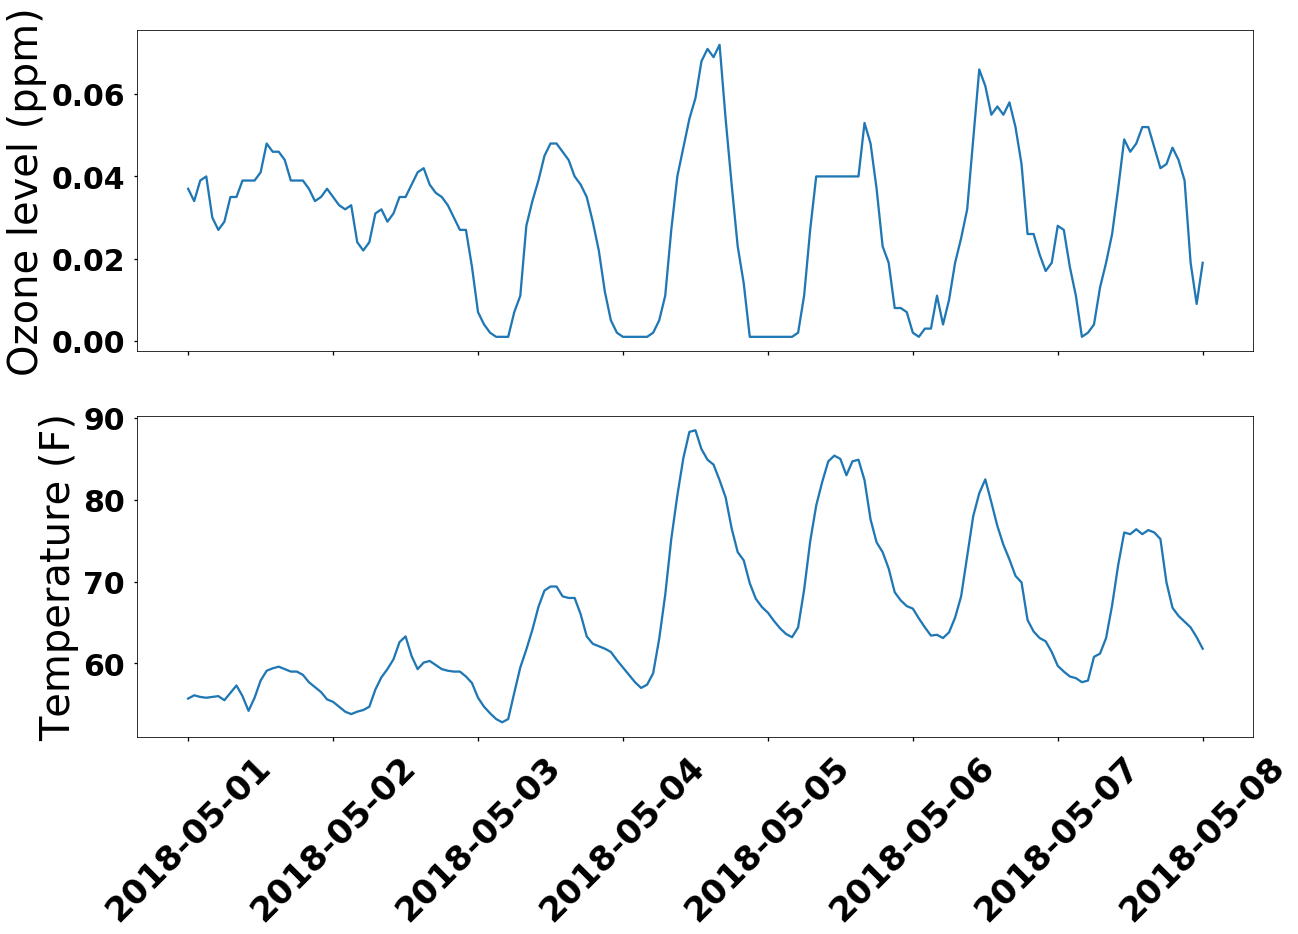

In [88]:
#zoom in and graph just one week of time

week = df['2018-05-01 00:00:00':'2018-05-08 00:00:00']
fig, ax = plt.subplots(2,1, figsize=(20, 13), sharex = True)
ax[0].plot(week.index, week['Ozone'])
ax[1].plot(week.index, week['Temp'])
# ax[2].plot(week.index, week['Pressure'])
# ax.set(title = 'Daily maximum levels', xlabel = 'Date')
ax[0].set(ylabel = 'Ozone level (ppm)')
ax[1].set(ylabel = 'Temperature (F)')
#ax[2].set(ylabel = 'Max pressure (mbars)')
ax[0].yaxis.label.set_size(40)
ax[1].yaxis.label.set_size(40)
# ax[2].yaxis.label.set_size(40)
plt.xticks(fontsize=34, rotation=45)
plt.savefig('week_line_plots1.png', bbox_inches = "tight")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

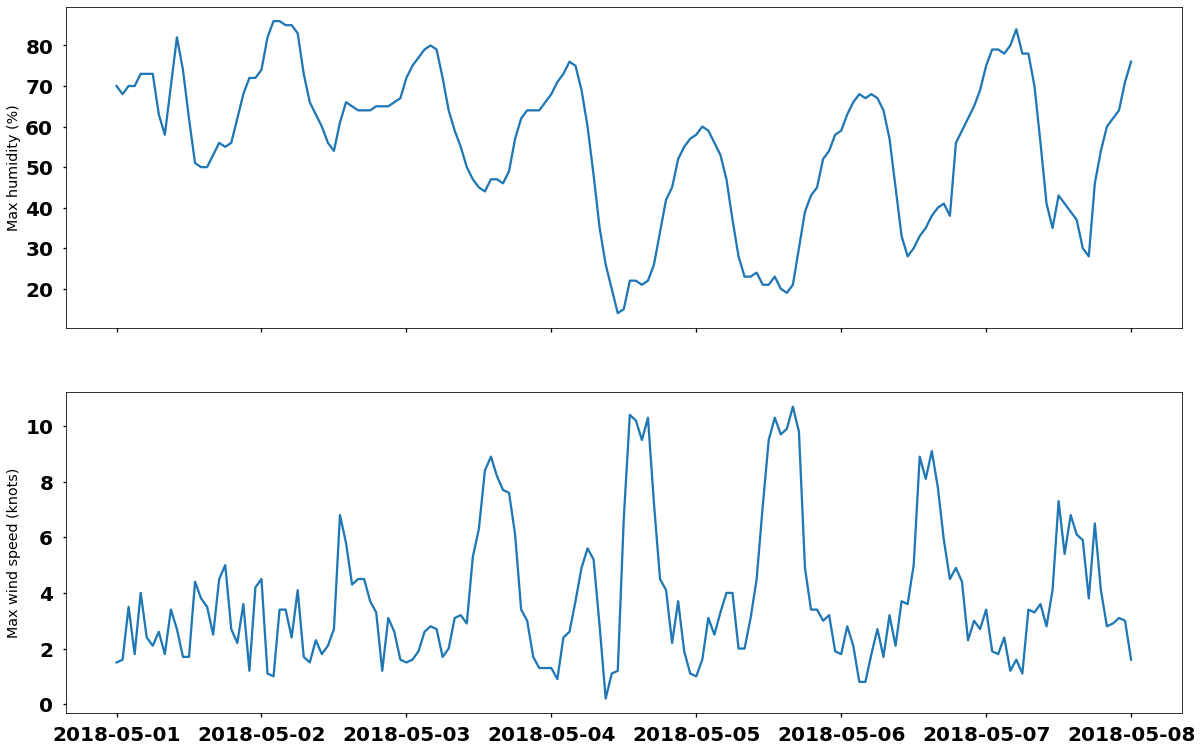

In [54]:
fig, ax = plt.subplots(2,1, figsize=(20, 13), sharex = True)
ax[0].plot(week.index, week['Humidity'])
ax[1].plot(week.index, week['Wind Speed'])

ax[0].set(ylabel = 'Max humidity (%)')
ax[1].set(ylabel = 'Max wind speed (knots)')
#plt.savefig('week_line_plots2.png')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

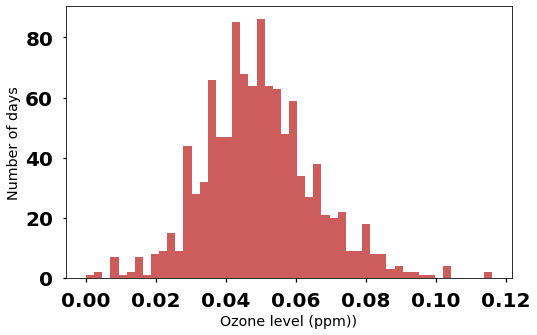

In [56]:
#histograph for max daily values of ozone
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(day_max['Ozone'], bins = 50, color = "indianred")
ax.set(title = '',
      xlabel = 'Ozone level (ppm))',
      ylabel = 'Number of days')
plt.show
#plt.savefig('ozone_hist.png')

<function matplotlib.pyplot.show(*args, **kw)>

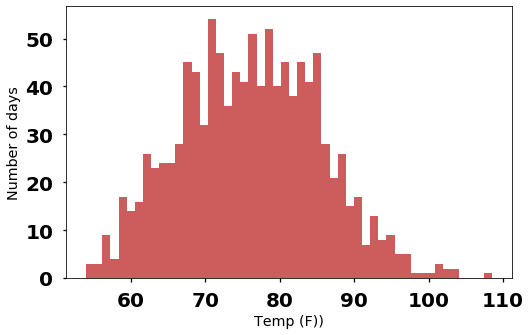

In [57]:
#histograph for max daily temp

fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(day_max['Temp'], bins = 50, color = "indianred")
ax.set(title = '',
      xlabel = 'Temp (F))',
      ylabel = 'Number of days')

plt.show
#plt.savefig('temp_hist.png')

<function matplotlib.pyplot.show(*args, **kw)>

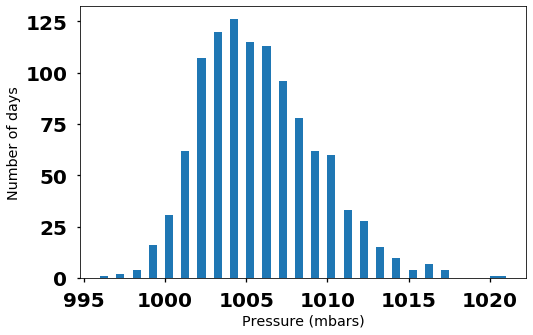

In [58]:
#histograph for max daily pressure

fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(day_max['Pressure'], bins = 50)
ax.set(title = '',
      xlabel = 'Pressure (mbars)',
      ylabel = 'Number of days')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

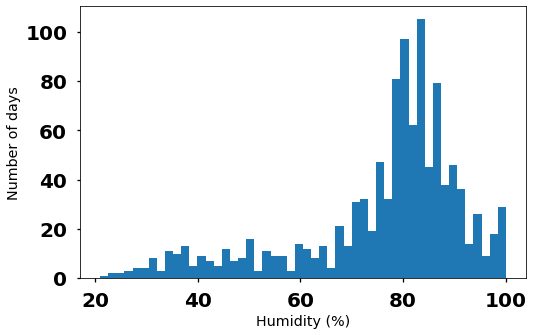

In [59]:
#histograph for max daily humidity

fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(day_max['Humidity'], bins = 50)
ax.set(title = '',
      xlabel = 'Humidity (%)',
      ylabel = 'Number of days')
plt.show

//anaconda3/envs/insight/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
//anaconda3/envs/insight/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<function matplotlib.pyplot.show(*args, **kw)>

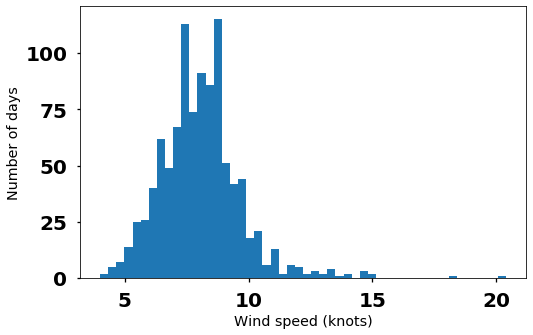

In [47]:
#histograph for max daily wind speed

fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(day_max['Wind Speed'], bins = 50)
ax.set(title = '',
      xlabel = 'Wind speed (knots)',
      ylabel = 'Number of days')
plt.show

In [60]:
#easy way to get lagged features - do everything in 8 hour chunks
#want new features to include weather information from 8, 16, and 24 hours previous
df8h = df.resample('8H').max()
df_past = pd.concat([df8h, df8h.shift(1), df8h.shift(2), df8h.shift(3)], axis=1)
df_past.columns = ['Temp', 'Ozone', 'Pressure', 'Humidity', 'Wind Speed',
                   'Temp-8', 'Ozone-8', 'Pressure-8', 'Humidity-8', 'Wind Speed-8',
                   'Temp-16', 'Ozone-16', 'Pressure-16', 'Humidity-16', 'Wind Speed-16',
                  'Temp-24', 'Ozone-24', 'Pressure-24', 'Humidity-24', 'Wind Speed-24']
df_past.head()

,Temp,Ozone,Pressure,Humidity,Wind Speed,Temp-8,Ozone-8,Pressure-8,Humidity-8,Wind Speed-8,Temp-16,Ozone-16,Pressure-16,Humidity-16,Wind Speed-16,Temp-24,Ozone-24,Pressure-24,Humidity-24,Wind Speed-24
Date,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,46.6,0.007,1009.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-01 08:00:00,65.0,0.044,1010.0,26.0,NaN,46.6,0.007,1009.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-01 16:00:00,63.5,0.037,1008.0,23.0,NaN,65.0,0.044,1010.0,26.0,NaN,46.6,0.007,1009.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-02 00:00:00,51.9,0.012,1008.0,32.0,NaN,63.5,0.037,1008.0,23.0,NaN,65.0,0.044,1010.0,26.0,NaN,46.6,0.007,1009.0,36.0,NaN
2016-01-02 08:00:00,64.9,0.034,1008.0,26.0,NaN,51.9,0.012,1008.0,32.0,NaN,63.5,0.037,1008.0,23.0,NaN,65.0,0.044,1010.0,26.0,NaN


In [63]:
#now look at weather data 8, 16, 24, 32, 40, and 48 hours into the future
#for real-time data I will use the weather forecast
df_future = pd.concat([df8h.shift(-1), df8h.shift(-2), df8h.shift(-3), df8h.shift(-4), df8h.shift(-5), df8h.shift(-6)], axis=1)
df_future.columns = ['Temp+8', 'Ozone+8', 'Pressure+8', 'Humidity+8', 'Wind Speed+8', 
                   'Temp+16', 'Ozone+16', 'Pressure+16', 'Humidity+16', 'Wind Speed+16',
                  'Temp+24', 'Ozone+24', 'Pressure+24', 'Humidity+24', 'Wind Speed+24', 
                    'Temp+32', 'Ozone+32', 'Pressure+32', 'Humidity+32', 'Wind Speed+32',
                    'Temp+40', 'Ozone+40', 'Pressure+40', 'Humidity+40', 'Wind Speed+40', 
                    'Temp+48', 'Ozone+48', 'Pressure+48', 'Humidity+48', 'Wind Speed+48']
df_future.tail(5)

,Temp+8,Ozone+8,Pressure+8,Humidity+8,Wind Speed+8,Temp+16,Ozone+16,Pressure+16,Humidity+16,Wind Speed+16,...,Temp+40,Ozone+40,Pressure+40,Humidity+40,Wind Speed+40,Temp+48,Ozone+48,Pressure+48,Humidity+48,Wind Speed+48
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-30 08:00:00,60.7,0.026,1002.0,76.0,5.8,50.0,0.001,1002.0,79.0,6.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-30 16:00:00,50.0,0.001,1002.0,79.0,6.4,62.1,0.034,1000.0,74.0,6.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31 00:00:00,62.1,0.034,1000.0,74.0,6.4,60.0,0.030,1002.0,41.0,4.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31 08:00:00,60.0,0.030,1002.0,41.0,4.6,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
#combine the future data and past data
df_lags = pd.merge(df_past, df_future, how = 'outer', left_index = True, right_index = True)
df_lags.tail(5)

,Temp,Ozone,Pressure,Humidity,Wind Speed,Temp-8,Ozone-8,Pressure-8,Humidity-8,Wind Speed-8,...,Temp+40,Ozone+40,Pressure+40,Humidity+40,Wind Speed+40,Temp+48,Ozone+48,Pressure+48,Humidity+48,Wind Speed+48
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-30 08:00:00,64.4,0.030,1007.0,42.0,5.0,47.4,0.001,1009.0,50.0,5.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-30 16:00:00,60.7,0.026,1002.0,76.0,5.8,64.4,0.030,1007.0,42.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31 00:00:00,50.0,0.001,1002.0,79.0,6.4,60.7,0.026,1002.0,76.0,5.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31 08:00:00,62.1,0.034,1000.0,74.0,6.4,50.0,0.001,1002.0,79.0,6.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31 16:00:00,60.0,0.030,1002.0,41.0,4.6,62.1,0.034,1000.0,74.0,6.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
#include month, hour, and day as features
df_lags['Month'] = df_lags.index.strftime('%b')
df_lags['Hour'] = df_lags.index.strftime('%H')
df_lags['Day'] = df_lags.index.strftime('%a')
df_lags.tail()

,Temp,Ozone,Pressure,Humidity,Wind Speed,Temp-8,Ozone-8,Pressure-8,Humidity-8,Wind Speed-8,...,Humidity+40,Wind Speed+40,Temp+48,Ozone+48,Pressure+48,Humidity+48,Wind Speed+48,Month,Hour,Day
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-30 08:00:00,64.4,0.030,1007.0,42.0,5.0,47.4,0.001,1009.0,50.0,5.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dec,08,Sun
2018-12-30 16:00:00,60.7,0.026,1002.0,76.0,5.8,64.4,0.030,1007.0,42.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dec,16,Sun
2018-12-31 00:00:00,50.0,0.001,1002.0,79.0,6.4,60.7,0.026,1002.0,76.0,5.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dec,00,Mon
2018-12-31 08:00:00,62.1,0.034,1000.0,74.0,6.4,50.0,0.001,1002.0,79.0,6.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dec,08,Mon
2018-12-31 16:00:00,60.0,0.030,1002.0,41.0,4.6,62.1,0.034,1000.0,74.0,6.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dec,16,Mon


In [66]:
#export dataframe with all the new lag features
df_lags.to_csv('ozone_8hr_lags.csv')